# Competição ML @SBS/DAA - 4ª Edição (2021/2022)
Esta competição está relacionada com o Trabalho Prático de Grupo das UCs do perfil Machine Learning: Fundamentos e Aplicações da Uminho e da UC Dados e Aprendizagem Automática, tendo, como destinatários, alunos do Mestrado em Engenharia Informática, do Mestrado em Matemática e Computação, e do Mestrado em Engenharia de Sistemas.

# Descrição da Competição
A modelação do fluxo de tráfego rodoviário é um conhecido problema de características estocásticas, não-lineares. Tem, contudo, aparecido na literatura um conjunto de modelos que demonstram um potencial assinalável neste tipo de previsões. Com isso em consideração, foi construído um *dataset* que contém dados referentes ao tráfego de veículos na cidade do Porto durante um período superior a 1 ano. O *dataset* cobre um período que vai desde o dia 24 de julho de 2018 até ao dia 02 de outubro de 2019.

Com esta competição espera-se que os alunos desenvolvam e otimizem modelos de *Machine Learning* que sejam capazes de prever o fluxo de tráfego rodoviário, numa determinada hora, na cidade do Porto.

In [ ]:
!pip install kaggle

In [1]:
#!kaggle competitions download -c tpsbsdaa2122

In [2]:
#import kaggle 
import kaggle 
import pandas as pd
import seaborn as sns
import numpy as np
import re
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.models import load_model
RANDOM_SEED=2006

## Load do *dataset* 

In [3]:
training_file = 'Datasets/training_data.csv'
test_file = 'Datasets/test_data.csv'

df = pd.read_csv(training_file,encoding = "ISO-8859-1")
df_test = pd.read_csv(test_file,encoding = "ISO-8859-1")

In [25]:
df.head()

city_name          record_date AVERAGE_SPEED_DIFF  AVERAGE_FREE_FLOW_SPEED  \
0     Porto  2019-08-29 07:00:00             Medium                     41.5   
1     Porto  2018-08-10 14:00:00               High                     41.7   
2     Porto  2019-09-01 16:00:00               High                     38.6   
3     Porto  2019-02-26 11:00:00               High                     37.4   
4     Porto  2019-06-06 12:00:00             Medium                     41.6   

   AVERAGE_TIME_DIFF  AVERAGE_FREE_FLOW_TIME LUMINOSITY  AVERAGE_TEMPERATURE  \
0               11.5                    71.4      LIGHT                 15.0   
1               48.3                    87.4      LIGHT                 21.0   
2               38.4                    85.2      LIGHT                 26.0   
3               61.0                    94.1      LIGHT                 18.0   
4               50.4                    77.0      LIGHT                 15.0   

   AVERAGE_ATMOSP_PRESSURE  AVERAGE_HUMIDITY  AVERAGE_WIND_SPEED  \
0                   1019.0             100.0                 3.0   
1                   1021.0              53.0                 5.0   
2                   1014.0              61.0                 4.0   
3                   1025.0              48.0                 4.0   
4                   1008.0              82.0                10.0   

  AVERAGE_CLOUDINESS  AVERAGE_PRECIPITATION AVERAGE_RAIN  
0                NaN                    0.0          NaN  
1          céu claro                    0.0          NaN  
2                NaN                    0.0          NaN  
3          céu claro                    0.0          NaN  
4                NaN                    0.0          NaN

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   city_name                6812 non-null   object  
 1   record_date              6812 non-null   object  
 2   AVERAGE_SPEED_DIFF       6812 non-null   category
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64 
 4   AVERAGE_TIME_DIFF        6812 non-null   float64 
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64 
 6   LUMINOSITY               6812 non-null   object  
 7   AVERAGE_TEMPERATURE      6812 non-null   float64 
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 9   AVERAGE_HUMIDITY         6812 non-null   float64 
 10  AVERAGE_WIND_SPEED       6812 non-null   float64 
 11  AVERAGE_CLOUDINESS       4130 non-null   category
 12  AVERAGE_PRECIPITATION    6812 non-null   float64 
 13  AVERAGE_RAIN             563 non-null    object  
dtypes: categ

In [3]:
df.describe()

AVERAGE_FREE_FLOW_SPEED  AVERAGE_TIME_DIFF  AVERAGE_FREE_FLOW_TIME  \
count              6812.000000        6812.000000             6812.000000   
mean                 40.661010          25.637111               81.143952   
std                   4.119023          33.510507                8.294401   
min                  30.500000           0.000000               46.400000   
25%                  37.600000           2.275000               75.400000   
50%                  40.700000          12.200000               82.400000   
75%                  43.500000          36.200000               87.400000   
max                  55.900000         296.500000              112.000000   

       AVERAGE_TEMPERATURE  AVERAGE_ATMOSP_PRESSURE  AVERAGE_HUMIDITY  \
count          6812.000000              6812.000000       6812.000000   
mean             16.193482              1017.388139         80.084190   
std               5.163492                 5.751061         18.238863   
min               0.000000               985.000000         14.000000   
25%              13.000000              1015.000000         69.750000   
50%              16.000000              1017.000000         83.000000   
75%              19.000000              1021.000000         93.000000   
max              35.000000              1033.000000        100.000000   

       AVERAGE_WIND_SPEED  AVERAGE_PRECIPITATION  
count         6812.000000                 6812.0  
mean             3.058573                    0.0  
std              2.138421                    0.0  
min              0.000000                    0.0  
25%              1.000000                    0.0  
50%              3.000000                    0.0  
75%              4.000000                    0.0  
max             14.000000                    0.0

Comparando os valores *max* de cada feature com os valores *mean* observamos uma grande discrepância entre o valor médio de *AVERAGE_TIME_DIFF* e o valor máximo desta *feature*. Pode ser que estejamos perante *outliers*.

In [ ]:
df.columns

## Features
* **city_name** - nome da cidade em causa;
* **record_date** - o timestamp associado ao registo;
* **average_speed_diff** - a diferença de velocidade corresponde à diferença entre (1.) a velocidade máxima que os carros podem atingir em cenários sem trânsito e (2.) a velocidade que realmente se verifica. Quanto mais alto o valor, maior é a diferença entre o que se está a andar no momento e o que se deveria estar a andar sem trânsito, i.e., valores altos deste atributo implicam que se está a andar mais devagar;
* **average_free_flow_speed** - o valor médio da velocidade máxima que os carros podem atingir em cenários sem trânsito;
* **average_time_diff** - o valor médio da diferença do tempo que se demora a percorrer um determinado conjunto de ruas. Quanto mais alto o valor maior é a diferença entre o tempo que demora para se percorrer as ruas e o que se deveria demorar sem trânsito, i.e., valores altos implicam que se está a demorar mais tempo a atravessar o conjunto de ruas;
* **average_free_flow_time** - o valor médio do tempo que demora a percorrer um determinado conjunto de ruas quando não há trânsito;
* **luminosity** - o nível de luminosidade que se verificava na cidade do Porto;
* **average_temperature - o valor médio da temperatura para o record_date na cidade do Porto;
* **average_atmosp_pressure** - o valor médio da pressão atmosférica para o record_date;
* **average_humidity** - o valor médio da humidade para o record_date;
* **average_wind_speed** - o valor médio da velocidade do vento para o record_date;
* **average_cloudiness** - o valor médio da percentagem de nuvens para o record_date;
* **average_precipitation** - o valor médio de precipitação para o record_date;
* **average_rain** - avaliação qualitativa da precipitação para o record_date.

In [ ]:
print(df.count())

In [26]:
print(df.isna().sum())

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64


<AxesSubplot:>

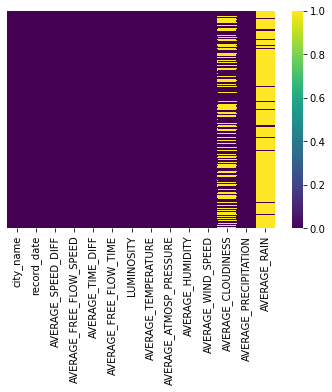

In [4]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

Verificamos que quase todos os valores de *AVERAGE_RAIN* são nulos e que existe uma percentagem significativa de valores nulos de *AVERAGE_CLOUDINESS*.

In [27]:
print(df.LUMINOSITY.unique())
print(df.AVERAGE_CLOUDINESS.unique())
print(df.city_name.unique())
print(df.AVERAGE_RAIN.unique())
print(df.AVERAGE_PRECIPITATION.unique())
print(df.record_date.unique())

['LIGHT' 'LOW_LIGHT' 'DARK']
[NaN, 'céu claro', 'nuvens dispersas', 'céu pouco nublado', 'céu limpo', 'algumas nuvens', 'nuvens quebrados', 'tempo nublado', 'nuvens quebradas', 'nublado']
Categories (9, object): ['céu claro', 'nuvens dispersas', 'céu pouco nublado', 'céu limpo', ..., 'nuvens quebrados', 'tempo nublado', 'nuvens quebradas', 'nublado']
['Porto']
[nan 'chuva fraca' 'chuva' 'chuva leve' 'chuvisco fraco' 'chuva moderada'
 'trovoada com chuva leve' 'aguaceiros' 'aguaceiros fracos'
 'chuva de intensidade pesada' 'trovoada com chuva'
 'chuva de intensidade pesado' 'chuva forte' 'chuvisco e chuva fraca']
[0.]
['2019-08-29 07:00:00' '2018-08-10 14:00:00' '2019-09-01 16:00:00' ...
 '2018-10-02 04:00:00' '2019-01-30 01:00:00' '2019-06-15 21:00:00']


Verifica-se que existem categorias nas *features* ***AVERAGE_CLOUDINESS*** e ***AVERAGE_PRECIPITATION*** que dizem respeito exatamente à mesma coisa.  

***AVERAGE_CLOUDINESS***
* 'nuvens quebradas' é o mesmo que 'nuvens quebrados'
* 'tempo nublado' é o mesmo que 'nublado'

***AVERAGE_PRECIPITATION***
* 'chuva intensidade pesada' é o mesmo que 'chuva intensidade pesado'
* etc.


In [28]:
for c in df.columns:
    valores_unicos = df[c].unique()
    if len(valores_unicos) < 10:
        print(f'{c} : {valores_unicos}')

city_name : ['Porto']
AVERAGE_SPEED_DIFF : ['Medium', 'High', 'None', 'Low', 'Very_High']
Categories (5, object): ['Medium', 'High', 'None', 'Low', 'Very_High']
LUMINOSITY : ['LIGHT' 'LOW_LIGHT' 'DARK']
AVERAGE_PRECIPITATION : [0.]


Verifica-se que as *features* ***LUMINOSITY***, ***AVERAGE_CLOUDINESS***, ***AVERAGE_RAIN*** e ***AVERAGE_PRECIPITATION***, apesar de possuírem dados categóricos, estes têm uma ordem implícita entre si. 

## Exploração de dados

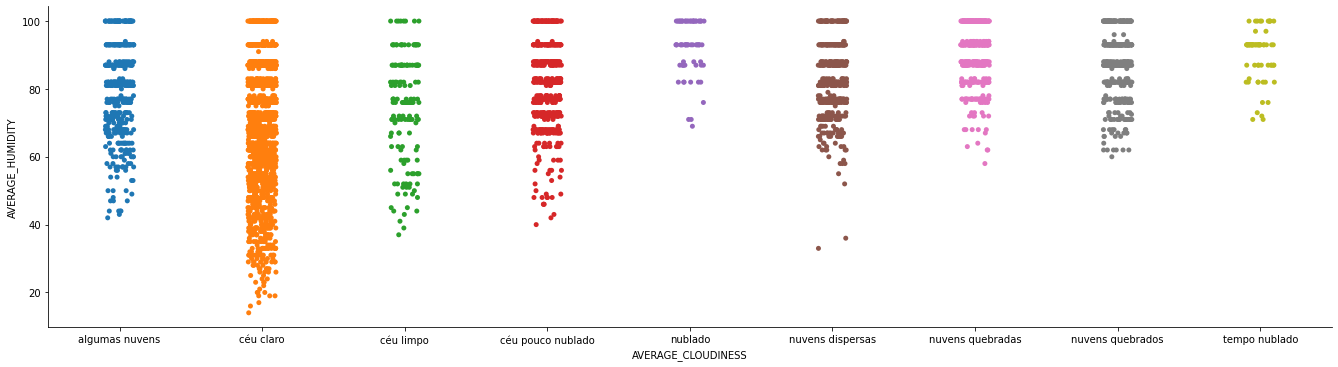

In [37]:
sea = sns.catplot(data=df, y="AVERAGE_HUMIDITY", x="AVERAGE_CLOUDINESS")
sea.fig.set_figwidth(22)
sea.fig.set_figheight(5)

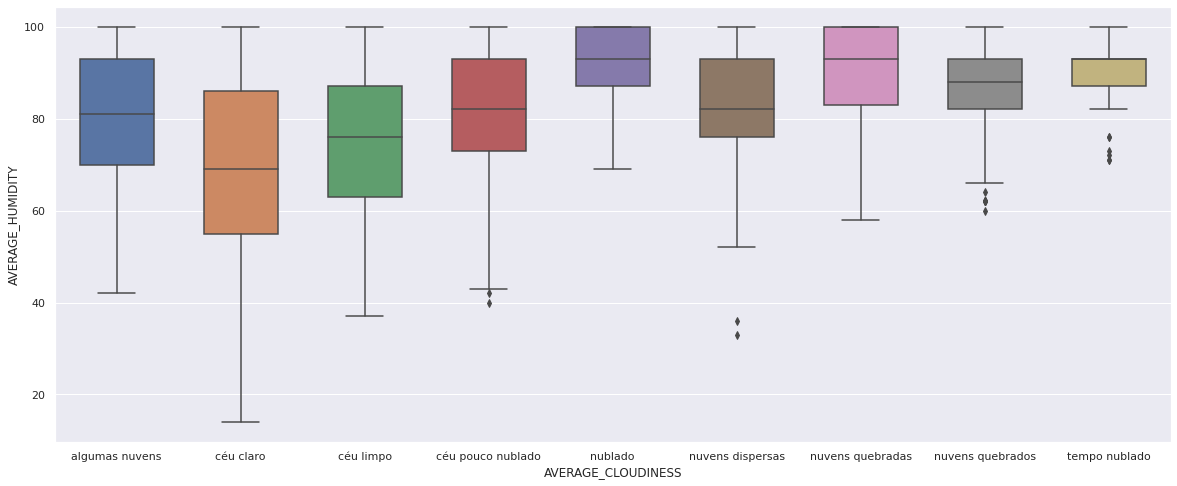

In [54]:
sns.set(rc = {'figure.figsize':(20,8)})
sea = sns.boxplot(x=df['AVERAGE_CLOUDINESS'],y=df['AVERAGE_HUMIDITY'],width=0.6)

<AxesSubplot:xlabel='AVERAGE_TIME_DIFF'>

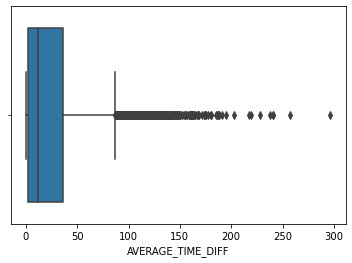

In [36]:
sns.boxplot(x=df['AVERAGE_TIME_DIFF'])

<AxesSubplot:xlabel='AVERAGE_TIME_DIFF'>

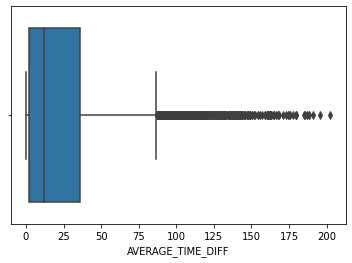

In [7]:
outliers = df[df['AVERAGE_TIME_DIFF'] > 205]
outliers_indexes = list(outliers.index)
df2 = df.drop(outliers_indexes)

sns.boxplot(x = df2['AVERAGE_TIME_DIFF'])

<AxesSubplot:xlabel='AVERAGE_TEMPERATURE'>

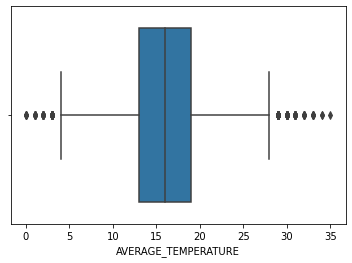

In [8]:
sns.boxplot(x=df['AVERAGE_TEMPERATURE'])

<AxesSubplot:xlabel='AVERAGE_FREE_FLOW_SPEED'>

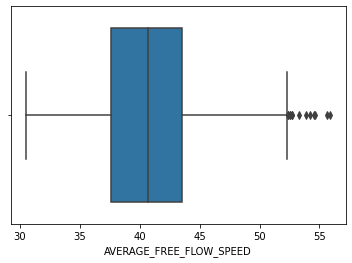

In [9]:
sns.boxplot(x=df['AVERAGE_FREE_FLOW_SPEED'])

<AxesSubplot:xlabel='AVERAGE_FREE_FLOW_TIME'>

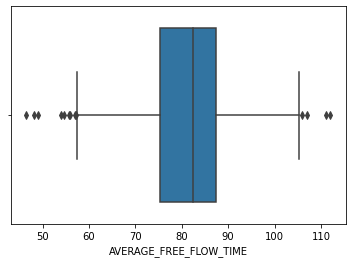

In [10]:
sns.boxplot(x=df['AVERAGE_FREE_FLOW_TIME'])

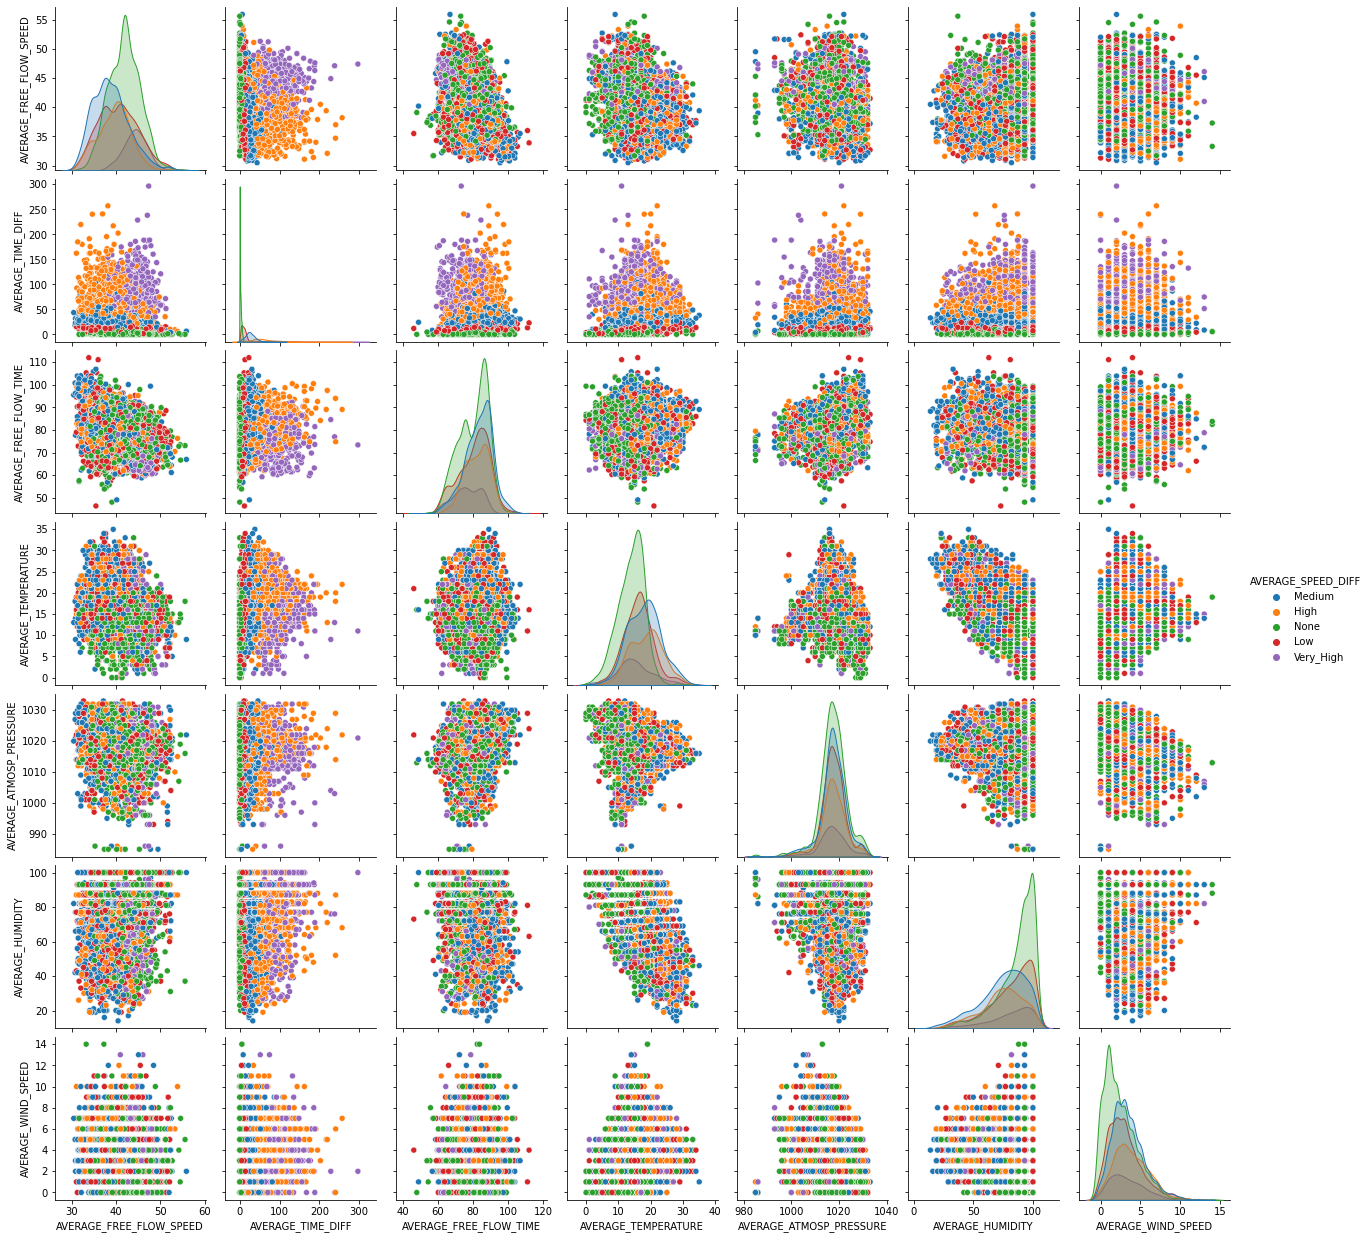

In [11]:
cols = ['AVERAGE_SPEED_DIFF', 'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED']

sns.pairplot(df[cols],hue='AVERAGE_SPEED_DIFF', height=2.5)

## Verificar quais dos valores de cloudiness dizem respeito à mesma coisa

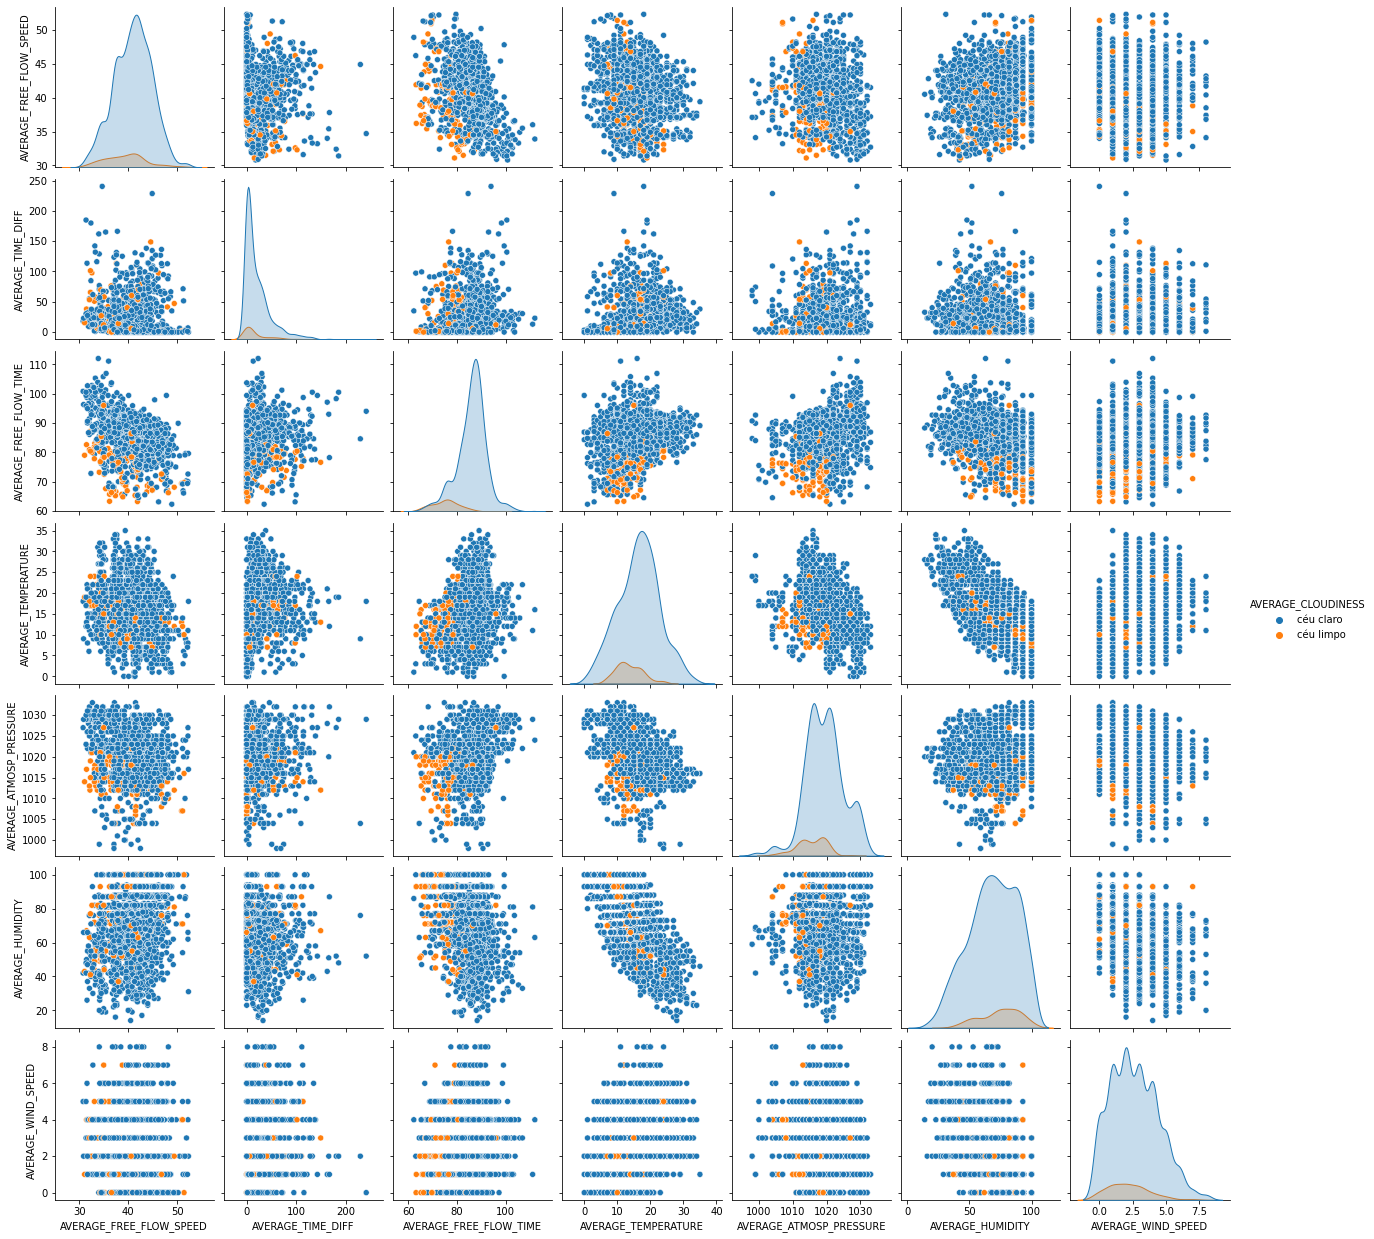

In [12]:
cols = ['AVERAGE_SPEED_DIFF', 'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED','AVERAGE_CLOUDINESS']
colunas_a_analisar = df[cols]

df['AVERAGE_CLOUDINESS'] = pd.Categorical(df['AVERAGE_CLOUDINESS'])    
sns.pairplot(colunas_a_analisar[df['AVERAGE_CLOUDINESS'].isin(['céu limpo','céu claro'])],hue='AVERAGE_CLOUDINESS', height=2.5)

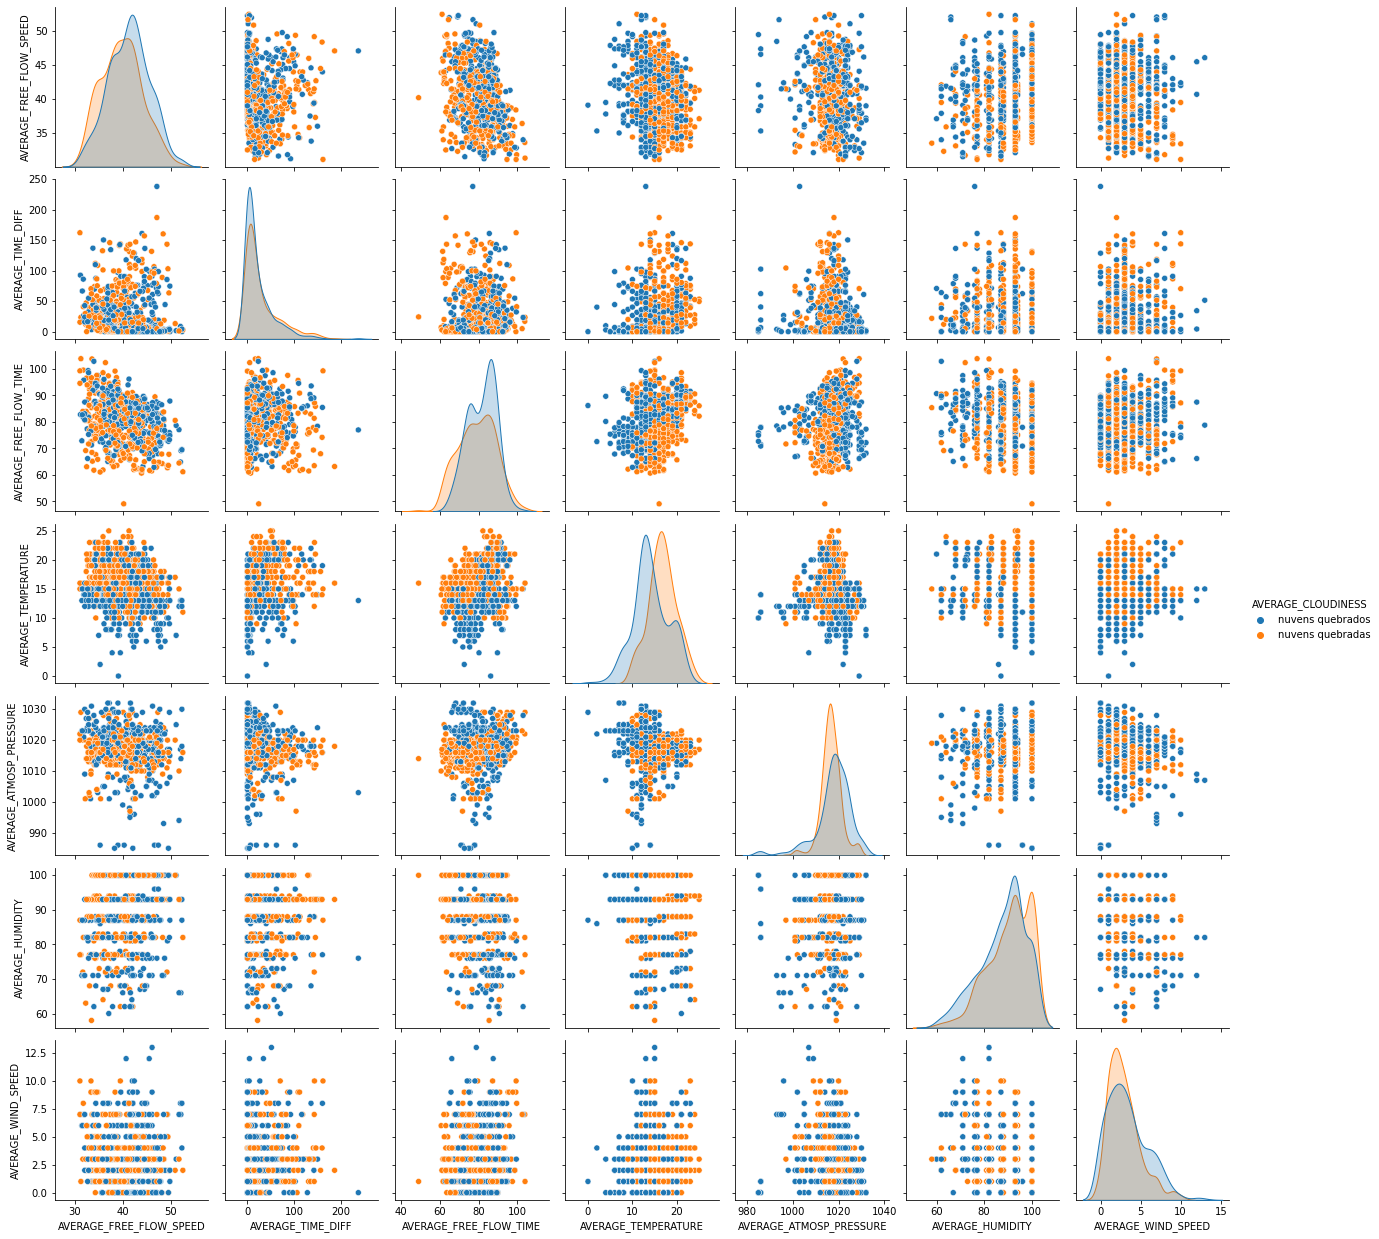

In [13]:
df['AVERAGE_CLOUDINESS'] = pd.Categorical(df['AVERAGE_CLOUDINESS'])    
sns.pairplot(colunas_a_analisar[df['AVERAGE_CLOUDINESS'].isin(['nuvens quebradas','nuvens quebrados'])],hue='AVERAGE_CLOUDINESS', height=2.5)

In [ ]:
df['AVERAGE_CLOUDINESS'] = pd.Categorical(df['AVERAGE_CLOUDINESS'])    
sns.pairplot(colunas_a_analisar[df['AVERAGE_CLOUDINESS'].isin(['tempo nublado','nublado'])],hue='AVERAGE_CLOUDINESS', height=2.5)

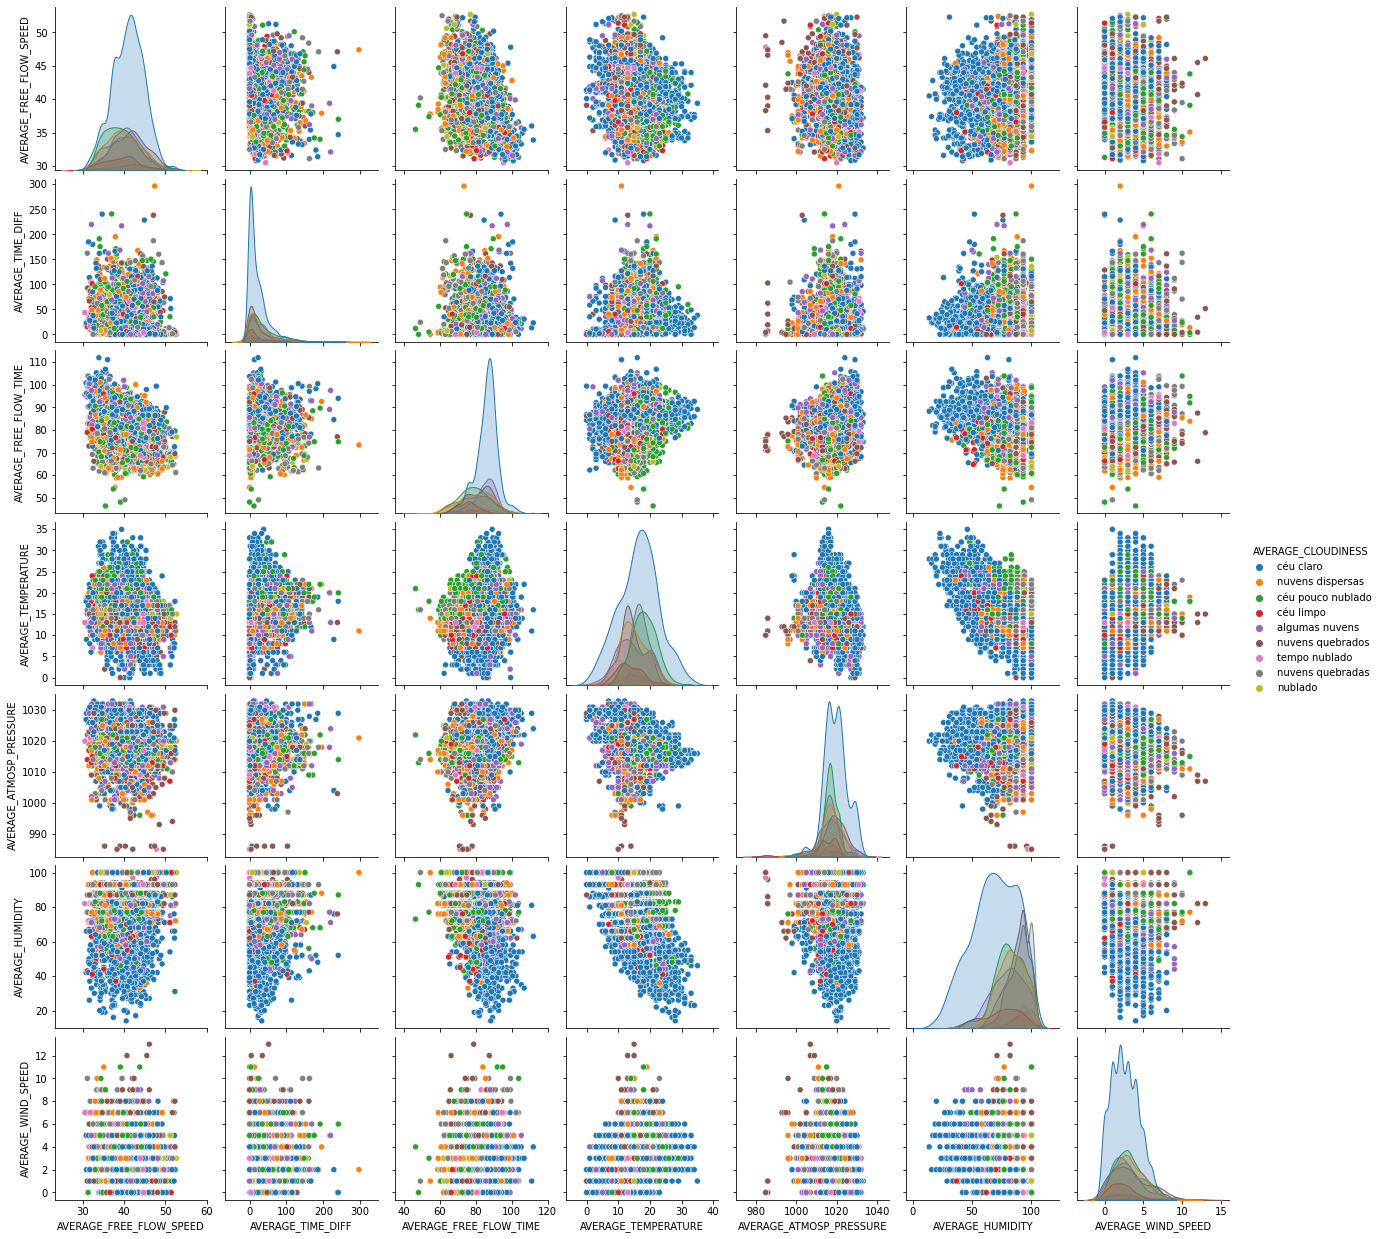

In [14]:
sns.pairplot(colunas_a_analisar,hue='AVERAGE_CLOUDINESS', height=2.5)

In [15]:
bigFig()
sea = sns.histplot(data=df, x="AVERAGE_CLOUDINESS")

NameError: name 'bigFig' is not defined

In [16]:
aux = df[['AVERAGE_HUMIDITY','AVERAGE_CLOUDINESS']].groupby(by='AVERAGE_CLOUDINESS').mean()
#for col in aux.columns:
#    aux[col] = aux[col].std()
aux

AVERAGE_HUMIDITY
AVERAGE_CLOUDINESS                  
algumas nuvens             79.559242
céu claro                  68.646018
céu limpo                  74.457516
céu pouco nublado          81.321705
nublado                    92.522388
nuvens dispersas           82.978214
nuvens quebradas           90.324519
nuvens quebrados           87.668527
tempo nublado              90.194030

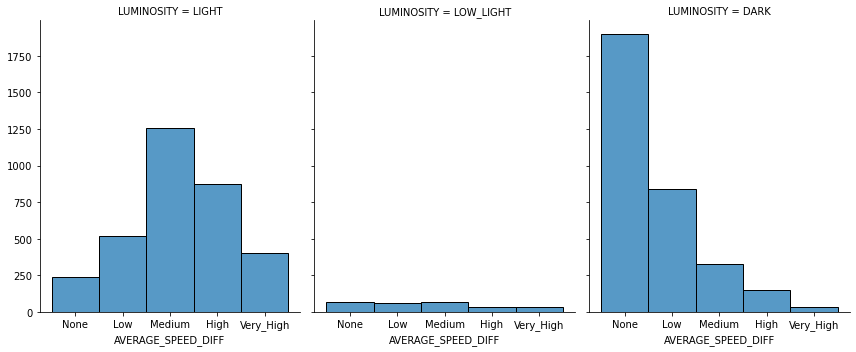

In [17]:
# Visualizar o impacto da luminosity no trânsito
df['AVERAGE_SPEED_DIFF'] = pd.Categorical(df['AVERAGE_SPEED_DIFF'], ["None", "Low", "Medium", "High", "Very_High"])    
    
sea = sns.FacetGrid(df, col = "LUMINOSITY", margin_titles = True)
sea.fig.set_figwidth(12)
sea.fig.set_figheight(5)
sea.map(sns.histplot, 'AVERAGE_SPEED_DIFF')

In [ ]:
df.groupby(by='AVERAGE_CLOUDINESS').mean()

## Tratamento de dados

### Transformarção de dados categóricos em ordinais

In [4]:
def categorical_to_ordinal(df):
    df['LUMINOSITY'].replace({"DARK": 0, "LOW_LIGHT": 1, "LIGHT": 2}, inplace=True)     
    df['AVERAGE_CLOUDINESS'].replace({"céu limpo": 0, "céu claro": 1, "nuvens dispersas": 2,"nuvens quebrados": 3,"nuvens quebradas": 3,"algumas nuvens": 4,"céu pouco nublado":5,'tempo nublado': 6,'nublado': 6}, inplace=True) 
    if 'AVERAGE_SPEED_DIFF' in df:
        df['AVERAGE_SPEED_DIFF'].replace({"None": 0, "Low": 1, "Medium": 2, "High": 3, "Very_High": 4}, inplace=True)
    return df

### Tratamento do campo 'record_date'

In [5]:
#Identificação de partes do dia (transformação da hora num dado categórico)
def daypart(hour):
    if hour > 0 and hour < 7:
        return "dawn"
    elif hour >= 7 and hour <= 10:
        return "early morning"
    elif hour > 10 and hour < 12:
        return "late morning"
    elif hour >= 12 and hour <= 14:
        return "lunch"
    elif hour > 14 and hour < 17:
        return "early afternoon"
    elif hour >= 17 and hour <= 20:
        return "late afternoon"
    elif hour > 20 and hour < 22:
        return "evening"
    else:
        return "midnight"
    
def is_weekend(day_name):
    if day_name == 'Saturday' or day_name == 'Sunday':
        return 1
    else:
        return 0

def is_friday(day_name):
    if day_name == 'Friday':
        return 1
    else:
        return 0 
    
def season(month):
    if month > 3 and month < 6:
        return "spring"
    elif month >= 6 and month <= 9:
        return "summer"
    elif month > 9 and month < 12:
        return "fall"
    else:
        return "winter"

# Função principal que trata do campo 'record_date'
# Passam a existir colunas que identificam a altura do dia, a estação do ano, bem como se é ou não fim-de-semana/sexta-feira/quinta-feira
def handle_date(df):
    if 'Is_weekend' not in df:
        df.record_date = pd.to_datetime(df.record_date)
        df['Month'] = df.record_date.dt.month
        df['Hour'] = df.record_date.dt.hour
        df['Day_name'] = df.record_date.dt.day_name()
        df['Day_Part'] = df['Hour'].apply(daypart)
        df['Is_weekend'] = df['Day_name'].apply(is_weekend)
        df['Is_friday'] = df['Day_name'].apply(is_friday)
        df['Season'] = df['Month'].apply(season)
        one_hot_dates = pd.get_dummies(df['Day_Part'])
        #one_hot_seasons = pd.get_dummies(df['Season'])
        df = pd.concat([df, one_hot_dates], axis=1)
        df = df.drop(['Month', 'Hour', 'Day_name', 'Day_Part', 'Season', 'record_date'],axis=1)
    return df
        

### Tatamento de *missing values*

In [6]:
# city_name e AVERAGE_PRECIPITATION só têm um valor único, logo não são relevantes
# Na coluna AVERAGE_RAIN quase todos os valores são nulos 
def drop_columns(df):
    return df.drop(['city_name','AVERAGE_PRECIPITATION','AVERAGE_RAIN'],axis=1)

In [7]:
df2 = df.copy()
aux = df2[['AVERAGE_HUMIDITY','AVERAGE_CLOUDINESS']].groupby(by='AVERAGE_CLOUDINESS').mean().sort_values(['AVERAGE_HUMIDITY'])

def fill_missing_cloudiness(humidity_and_cloudiness):
    (humidity, cloudiness) = humidity_and_cloudiness
    if pd.isnull(cloudiness):
        closest = float('inf')
        best = ''
        for row in aux.itertuples():
            if abs(humidity - float(row[1])) < closest:
                   best = row[0]
                   closest = abs(humidity - float(row[1]))
            else:
                   break
        return best
    else:
        return cloudiness
    
    
def fill_missing_values(df):
    #df['AVERAGE_CLOUDINESS'] = df['AVERAGE_CLOUDINESS'].fillna(method='bfill')
    df['AVERAGE_CLOUDINESS'] = df[['AVERAGE_HUMIDITY','AVERAGE_CLOUDINESS']].apply(fill_missing_cloudiness, axis=1)
    return df

fill_missing_values(df2)
#print(df2.isna().sum())

city_name          record_date AVERAGE_SPEED_DIFF  \
0        Porto  2019-08-29 07:00:00             Medium   
1        Porto  2018-08-10 14:00:00               High   
2        Porto  2019-09-01 16:00:00               High   
3        Porto  2019-02-26 11:00:00               High   
4        Porto  2019-06-06 12:00:00             Medium   
...        ...                  ...                ...   
6807     Porto  2019-02-23 09:00:00                Low   
6808     Porto  2019-06-08 18:00:00             Medium   
6809     Porto  2018-10-02 04:00:00               None   
6810     Porto  2019-01-30 01:00:00               None   
6811     Porto  2019-06-15 21:00:00             Medium   

      AVERAGE_FREE_FLOW_SPEED  AVERAGE_TIME_DIFF  AVERAGE_FREE_FLOW_TIME  \
0                        41.5               11.5                    71.4   
1                        41.7               48.3                    87.4   
2                        38.6               38.4                    85.2   
3                        37.4               61.0                    94.1   
4                        41.6               50.4                    77.0   
...                       ...                ...                     ...   
6807                     41.2                3.7                    86.9   
6808                     38.9               51.9                    76.9   
6809                     39.6                0.0                    89.1   
6810                     41.6                0.0                    85.5   
6811                     41.7               32.9                    78.1   

     LUMINOSITY  AVERAGE_TEMPERATURE  AVERAGE_ATMOSP_PRESSURE  \
0         LIGHT                 15.0                   1019.0   
1         LIGHT                 21.0                   1021.0   
2         LIGHT                 26.0                   1014.0   
3         LIGHT                 18.0                   1025.0   
4         LIGHT                 15.0                   1008.0   
...         ...                  ...                      ...   
6807      LIGHT                  9.0                   1030.0   
6808      LIGHT                 17.0                   1020.0   
6809       DARK                 15.0                   1020.0   
6810       DARK                  8.0                   1018.0   
6811       DARK                 15.0                   1021.0   

      AVERAGE_HUMIDITY  AVERAGE_WIND_SPEED AVERAGE_CLOUDINESS  \
0                100.0                 3.0            nublado   
1                 53.0                 5.0          céu claro   
2                 61.0                 4.0          céu claro   
3                 48.0                 4.0          céu claro   
4                 82.0                10.0  céu pouco nublado   
...                ...                 ...                ...   
6807              71.0                 4.0          céu claro   
6808              63.0                 6.0          céu claro   
6809              39.0                 4.0          céu claro   
6810              81.0                 1.0     algumas nuvens   
6811              72.0                 4.0          céu limpo   

      AVERAGE_PRECIPITATION AVERAGE_RAIN  
0                       0.0          NaN  
1                       0.0          NaN  
2                       0.0          NaN  
3                       0.0          NaN  
4                       0.0          NaN  
...                     ...          ...  
6807                    0.0          NaN  
6808                    0.0          NaN  
6809                    0.0          NaN  
6810                    0.0          NaN  
6811                    0.0          NaN  

[6812 rows x 14 columns]

### Tratamento de *outliers*

In [8]:
# Tratamento de outliers no campo 'AVERAGE_TIME_DIFF'
def handle_averagetimediff_outliers(df):
    outliers = df[df['AVERAGE_TIME_DIFF'] > 205]
    outliers_indexes = list(outliers.index)
    return df.drop(outliers_indexes)

In [9]:
def tratamentoDados(df):
    df = drop_columns(df)
    df = fill_missing_values(df)
    df = categorical_to_ordinal(df)
    df = handle_date(df)
    df = handle_averagetimediff_outliers(df)
    return df

In [10]:
dftrain = tratamentoDados(df)

## **Dados tratados. Fazer predictions**

In [11]:
X = dftrain.drop(['AVERAGE_SPEED_DIFF'], axis=1)
y = dftrain['AVERAGE_SPEED_DIFF'].to_frame()

### **Decision Trees**

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=RANDOM_SEED)

In [15]:
clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
confusion_matrix(y_test,predictions)

array([[373,  51,   3,   0,   0],
       [ 63, 155,  47,   1,   0],
       [  5,  54, 229,  59,   2],
       [  2,   3,  44, 151,  25],
       [  0,   0,   0,  26,  68]])

In [16]:
accuracy_score(y_test,predictions)

0.7171197648787656

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       427
           1       0.59      0.58      0.59       266
           2       0.71      0.66      0.68       349
           3       0.64      0.67      0.65       225
           4       0.72      0.72      0.72        94

    accuracy                           0.72      1361
   macro avg       0.70      0.70      0.70      1361
weighted avg       0.72      0.72      0.72      1361



In [18]:
clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
param_grid = {'max_features': ['auto', 'sqrt', 'log2',None],
              'ccp_alpha': [0.1, .01, .001,.0001,0],
              'max_depth' : [2,3,4,6,8,10,12],
              'criterion' :['gini', 'entropy'],
              'splitter' : ['best','random']
             }
grid_search = GridSearchCV(estimator=clf,param_grid=param_grid,cv=10,verbose=True)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2006),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 0],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 8, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             verbose=True)

In [21]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.765389 using {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'splitter': 'best'}


In [22]:
best_mlp_model=grid_search.best_estimator_
grid_search.best_params_
means=grid_search.cv_results_['mean_test_score']
stds=grid_search.cv_results_['std_test_score']
params=grid_search.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

0.532795 (0.007344) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'best'}
0.325740 (0.000991) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'random'}
0.532795 (0.007344) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'splitter': 'best'}
0.325740 (0.000991) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'splitter': 'random'}
0.532795 (0.007344) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'best'}
0.325740 (0.000991) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'random'}
0.532795 (0.007344) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'splitter': 'best'}
0.325740 (0.000991) with: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'splitter'

In [23]:
predictions = best_mlp_model.predict(X_test)
confusion_matrix(y_test,predictions)

array([[397,  29,   1,   0,   0],
       [ 64, 180,  22,   0,   0],
       [  7,  56, 229,  55,   2],
       [  0,   3,  30, 172,  20],
       [  0,   0,   0,  34,  60]])

In [24]:
accuracy_score(y_test,predictions)

0.7626745040411462

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       427
           1       0.67      0.68      0.67       266
           2       0.81      0.66      0.73       349
           3       0.66      0.76      0.71       225
           4       0.73      0.64      0.68        94

    accuracy                           0.76      1361
   macro avg       0.74      0.73      0.74      1361
weighted avg       0.77      0.76      0.76      1361



### **Support Vector Machine**

In [12]:
scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20, random_state=RANDOM_SEED)

In [13]:
svc = SVC(random_state=RANDOM_SEED)
svc.fit(X_train,np.ravel(y_train))
predictions = svc.predict(X_test)
confusion_matrix(y_test,predictions)

array([[392,  21,  14,   0,   0],
       [158,  22,  86,   0,   0],
       [ 45,  10, 271,  23,   0],
       [  3,   0,  53, 155,  14],
       [  0,   0,   0,  28,  66]])

In [14]:
accuracy_score(y_test,predictions)

0.665686994856723

In [23]:
svc = SVC(random_state=RANDOM_SEED)
svm_linear = {'C': [1,10,100,10000],'kernel':['linear']}
svm_others = {'C': [1,10,100,10000],'gamma':[0.1,0.01,0.001,0.0001,'auto'],'kernel':['rbf','poly','sigmoid']}
param_grid = [svm_others,svm_linear]
grid_search = GridSearchCV(estimator=svc,param_grid=param_grid,cv=5,verbose=3)
grid_search.fit(X_train,np.ravel(y_train))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.646 total time=   0.7s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.638 total time=   0.7s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.646 total time=   0.7s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.644 total time=   0.7s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.622 total time=   0.7s
[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.605 total time=   0.6s
[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.604 total time=   0.6s
[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.606 total time=   0.6s
[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.608 total time=   0.6s
[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.592 total time=   0.6s
[CV 1/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.619 total time=   1.0s
[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid

[CV 2/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.634 total time=   0.9s
[CV 3/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.631 total time=   0.9s
[CV 4/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.639 total time=   0.8s
[CV 5/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.626 total time=   0.8s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.586 total time=   0.8s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.564 total time=   0.8s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.579 total time=   0.8s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.571 total time=   0.8s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.565 total time=   0.8s
[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.326 total time=   0.9s
[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.325 total time=   0.8s
[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.325 total time=   0.8s
[CV 4/5] END ....C=10, gamma

[CV 4/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.326 total time=   0.8s
[CV 5/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.326 total time=   0.9s
[CV 1/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.540 total time=   1.0s
[CV 2/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.534 total time=   1.0s
[CV 3/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.540 total time=   1.0s
[CV 4/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.505 total time=   1.0s
[CV 5/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.508 total time=   1.0s
[CV 1/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.770 total time=   0.5s
[CV 2/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.794 total time=   0.5s
[CV 3/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.775 total time=   0.5s
[CV 4/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.771 total time=   0.5s
[CV 5/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.773 total time=   0.5s
[CV 1/5] END ....C=100,

[CV 5/5] END ................C=1, kernel=linear;, score=0.687 total time=   0.4s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.764 total time=   0.4s
[CV 2/5] END ...............C=10, kernel=linear;, score=0.770 total time=   0.4s
[CV 3/5] END ...............C=10, kernel=linear;, score=0.763 total time=   0.4s
[CV 4/5] END ...............C=10, kernel=linear;, score=0.762 total time=   0.4s
[CV 5/5] END ...............C=10, kernel=linear;, score=0.767 total time=   0.4s
[CV 1/5] END ..............C=100, kernel=linear;, score=0.775 total time=   0.7s
[CV 2/5] END ..............C=100, kernel=linear;, score=0.776 total time=   0.7s
[CV 3/5] END ..............C=100, kernel=linear;, score=0.774 total time=   0.8s
[CV 4/5] END ..............C=100, kernel=linear;, score=0.778 total time=   0.7s
[CV 5/5] END ..............C=100, kernel=linear;, score=0.778 total time=   0.7s
[CV 1/5] END ............C=10000, kernel=linear;, score=0.783 total time=  28.5s
[CV 2/5] END ............C=1

GridSearchCV(cv=5, estimator=SVC(random_state=2006),
             param_grid=[{'C': [1, 10, 100, 10000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['rbf', 'poly', 'sigmoid']},
                         {'C': [1, 10, 100, 10000], 'kernel': ['linear']}],
             verbose=3)

In [24]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.783575 using {'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}


In [25]:
best_mlp_model=grid_search.best_estimator_
grid_search.best_params_
means=grid_search.cv_results_['mean_test_score']
stds=grid_search.cv_results_['std_test_score']
params=grid_search.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

0.639351 (0.009028) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.602975 (0.005639) with: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.602974 (0.009764) with: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.575049 (0.006214) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.325740 (0.000559) with: {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.524704 (0.015504) with: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.474919 (0.008649) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.325740 (0.000559) with: {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.480614 (0.010648) with: {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.325740 (0.000559) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.325740 (0.000559) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.325740 (0.000559) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.632186 (0.008937) with: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.492923 (0.011430) with: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.589930 (0.009053) with: {'C':

In [26]:
predictions = best_mlp_model.predict(X_test)
confusion_matrix(y_test,predictions)

array([[400,  27,   0,   0,   0],
       [ 55, 185,  26,   0,   0],
       [  1,  48, 272,  28,   0],
       [  0,   2,  37, 167,  19],
       [  0,   0,   0,  20,  74]])

In [27]:
accuracy_score(y_test,predictions)

0.8067597354886114

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       427
           1       0.71      0.70      0.70       266
           2       0.81      0.78      0.80       349
           3       0.78      0.74      0.76       225
           4       0.80      0.79      0.79        94

    accuracy                           0.81      1361
   macro avg       0.79      0.79      0.79      1361
weighted avg       0.80      0.81      0.81      1361



### **Neural Network**

In [44]:
scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20, random_state=RANDOM_SEED)
y_train=to_categorical(y_train)

In [21]:
TUNING_DICT = {
    'neurons1' : [32,64,128,256,512],
    'neurons2' : [32,64,128,256,512],
    'batch_size' : [10,30,60,80,100]
}

In [39]:
def build_model(neurons1=64,neurons2=32):
    model=Sequential()
    model.add(Dense(neurons1,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dense(neurons2,activation='relu'))
    model.add(Dense(5,activation='sigmoid'))
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = 'adam',
        metrics=['accuracy'])
    return model

In [40]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
kf = KFold(n_splits=5,shuffle=True,random_state=RANDOM_SEED)
model = KerasClassifier(build_fn=build_model,epochs=1000,verbose=0)
grid_search = RandomizedSearchCV(estimator=model,
                          param_distributions=TUNING_DICT,
                          n_iter=25,
                          cv=kf,
                          refit='True',
                          verbose=1)
grid_search.fit(X_train,y_train,validation_split=0.2,verbose=1,callbacks=[es])

Fitting 5 folds for each of 25 candidates, totalling 125 fits


ValueError: momentum is not a legal parameter

In [25]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.784496 using {'neurons2': 32, 'neurons1': 32, 'batch_size': 30}


In [26]:
best_mlp_model=grid_search.best_estimator_
grid_search.best_params_
means=grid_search.cv_results_['mean_test_score']
stds=grid_search.cv_results_['std_test_score']
params=grid_search.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

0.780636 (0.007051) with: {'neurons2': 128, 'neurons1': 64, 'batch_size': 100}
0.779350 (0.015214) with: {'neurons2': 64, 'neurons1': 128, 'batch_size': 60}
0.778802 (0.013044) with: {'neurons2': 128, 'neurons1': 512, 'batch_size': 100}
0.780452 (0.014355) with: {'neurons2': 256, 'neurons1': 32, 'batch_size': 60}
0.775494 (0.014875) with: {'neurons2': 512, 'neurons1': 64, 'batch_size': 80}
0.773104 (0.008821) with: {'neurons2': 512, 'neurons1': 256, 'batch_size': 100}
0.779166 (0.010888) with: {'neurons2': 512, 'neurons1': 32, 'batch_size': 60}
0.783211 (0.012297) with: {'neurons2': 128, 'neurons1': 32, 'batch_size': 100}
0.776413 (0.014199) with: {'neurons2': 32, 'neurons1': 256, 'batch_size': 30}
0.783027 (0.013340) with: {'neurons2': 32, 'neurons1': 64, 'batch_size': 60}
0.763738 (0.022986) with: {'neurons2': 512, 'neurons1': 512, 'batch_size': 10}
0.773840 (0.008306) with: {'neurons2': 512, 'neurons1': 512, 'batch_size': 30}
0.781373 (0.011225) with: {'neurons2': 32, 'neurons1': 32

In [41]:
TUNING_DICT = {
    'activation' : ['softsign', 'tanh','hard_sigmoid'],
    'init_mode' : ['normal','glorot_normal','glorot_uniform'],
    'learn_rate' : [0.0001,0.001,0.01,0.1],
    'momentum' : [0.4, 0.6, 0.8, 0.9]
}

In [ ]:
TUNING_DICT = {
    #'learn_rate' : [0.0001,0.001,0.01,0.1,0.2],//0.001
    #'momentum' : [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]//0.6 0.9
    #'init_mode' : ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],//normal + all glorot
    #'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],//softsign than hard_sigmoid
    #'weight_constraint' : [1, 2, 3, 4, 5],
    #'dropout_rate' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    #'batch_size' : [10, 20, 40, 60, 80, 100],
    #'epochs' : [10, 50, 100]
    #'optimizer' : ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    #'lactivation' : ['softmax',sigmoid']
}

In [47]:
def build_model(activation='softsign',learn_rate=0.001,momentum=0.9,init_mode='glorot_normal'):
    model=Sequential()
    model.add(Dense(256,input_dim=X_train.shape[1],activation=activation,kernel_initializer=init_mode))
    model.add(Dense(128,activation=activation,kernel_initializer=init_mode))
    model.add(Dense(5,activation='sigmoid',kernel_initializer=init_mode))
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = tf.optimizers.Adam(learn_rate,momentum),
        metrics=['accuracy'])
    return model

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
kf = KFold(n_splits=2,shuffle=True,random_state=RANDOM_SEED)
model = KerasClassifier(build_fn=build_model,epochs=1000,batch_size=80,verbose=0)
grid_search = RandomizedSearchCV(estimator=model,
                          n_iter = 5,
                          param_distributions=TUNING_DICT,
                          cv=kf,
                          refit='True',
                          verbose=1)
grid_search.fit(X_train,y_train,validation_split=0.2,verbose=1,callbacks=[es])

In [15]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.788537 using {'activation': 'tanh', 'init_mode': 'glorot_uniform', 'learn_rate': 0.0001, 'momentum': 0.4}


In [16]:
best_mlp_model=grid_search.best_estimator_
grid_search.best_params_
means=grid_search.cv_results_['mean_test_score']
stds=grid_search.cv_results_['std_test_score']
params=grid_search.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

0.781741 (0.010717) with: {'activation': 'softsign', 'init_mode': 'normal', 'learn_rate': 0.0001, 'momentum': 0.4}
0.783576 (0.006347) with: {'activation': 'softsign', 'init_mode': 'normal', 'learn_rate': 0.0001, 'momentum': 0.6}
0.779168 (0.010036) with: {'activation': 'softsign', 'init_mode': 'normal', 'learn_rate': 0.0001, 'momentum': 0.8}
0.781556 (0.008907) with: {'activation': 'softsign', 'init_mode': 'normal', 'learn_rate': 0.0001, 'momentum': 0.9}
0.782109 (0.010877) with: {'activation': 'softsign', 'init_mode': 'normal', 'learn_rate': 0.001, 'momentum': 0.4}
0.775494 (0.012263) with: {'activation': 'softsign', 'init_mode': 'normal', 'learn_rate': 0.001, 'momentum': 0.6}
0.778431 (0.004796) with: {'activation': 'softsign', 'init_mode': 'normal', 'learn_rate': 0.001, 'momentum': 0.8}
0.784863 (0.011484) with: {'activation': 'softsign', 'init_mode': 'normal', 'learn_rate': 0.001, 'momentum': 0.9}
0.752901 (0.020719) with: {'activation': 'softsign', 'init_mode': 'normal', 'learn_r

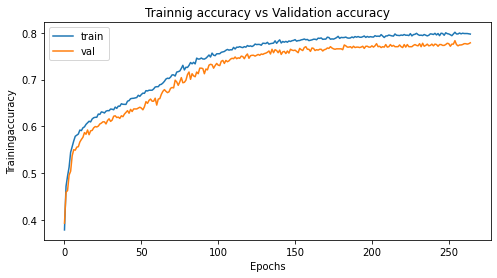

In [17]:
best_mlp_model=grid_search.best_estimator_
def plot_learning_curve(history,metric='accuracy'):
    plt.figure(figsize=(8,4))
    plt.title('Trainnig accuracy vs Validation accuracy')
    plt.plot(history.epoch,history.history['accuracy'],label='train')
    plt.plot(history.epoch,history.history['val_accuracy'],label='val')
    plt.ylabel('Training' + metric)
    plt.xlabel('Epochs')
    plt.legend()
plot_learning_curve(best_mlp_model.model.history, metric='accuracy')

In [ ]:
predictions = best_mlp_model.predict(X_test)
confusion_matrix(y_test,predictions)

In [19]:
accuracy_score(y_test,predictions)

0.8067597354886114

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       427
           1       0.71      0.66      0.68       266
           2       0.83      0.75      0.79       349
           3       0.79      0.77      0.78       225
           4       0.80      0.82      0.81        94

    accuracy                           0.81      1361
   macro avg       0.80      0.79      0.79      1361
weighted avg       0.80      0.81      0.80      1361

